### Least square moving average
It is calculated using the least-squares regression analysis method, which involves finding the line of best fit through a set of price data points. This line is then used to calculate the moving average, which provides traders with an indication of the direction of the trend.

Best fit line: In linear regression, the "best fit line" (also known as the regression line or line of best fit) is a straight line that best represents the relationship between a dependent variable (y) and one or more independent variables (x).



In [8]:
# importing libnaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Dependent variable, X: 'Day1', 'Day2',....

Indpendent variable, y: 'Close Price'

In [9]:
# Fetching the data
data = yf.download('PLTR', start= '2020-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [10]:
window = 25

test_df = data[:window]

In [11]:
# Shape or the test data
test_df.shape

(25, 5)

In [14]:
# Assigning the dependent variable
y_ = test_df['Close']
y_

Ticker,PLTR
Date,
2020-09-30,9.50
2020-10-01,9.46
2020-10-02,9.20
2020-10-05,9.03
2020-10-06,9.90
2020-10-07,10.00
2020-10-08,10.00
2020-10-09,9.95
2020-10-12,9.89


In [20]:
# Independent variable
X_ = pd.Series(range(len(test_df.index))).values

In [24]:
model_ = sm.OLS(y_, sm.add_constant(X_)).fit()
model_.params

const    9.312554
x1       0.044754
dtype: float64

In [26]:
model_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PLTR   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     14.07
Date:                Sun, 13 Apr 2025   Prob (F-statistic):            0.00104
Time:                        20:54:36   Log-Likelihood:                -13.340
No. Observations:                  25   AIC:                             30.68
Df Residuals:                      23   BIC:                             33.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3126      0.167     55.758      0.000       8.967       9.658
x1             0.0448      0.012      3.751      0.001       0.020       0.069
==============================================================================
Omnibus:                        1.136   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                0.838
Skew:                          -0.033   Prob(JB):                        0.658
Kurtosis:                       2.106   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we can start making predictions.

We will make predictions on the last row 24.

In [30]:
# m * x + b
9.312554 +24 * 0.044754

10.38665

In [31]:
model_.predict()

array([ 9.31255377,  9.35730762,  9.40206148,  9.44681533,  9.49156918,
        9.53632303,  9.58107688,  9.62583073,  9.67058458,  9.71533844,
        9.76009229,  9.80484614,  9.84959999,  9.89435384,  9.93910769,
        9.98386155, 10.0286154 , 10.07336925, 10.1181231 , 10.16287695,
       10.2076308 , 10.25238465, 10.29713851, 10.34189236, 10.38664621])

As we can see 10.38665 is the last value from the data.

We are now going to slice the dataset and every time we slice the dataset by we will increment the value by 1 at the end. for example 2020-11-03	10.50
was our last value in y_ but now we will move forward work with a larger dataset and apply the least_square_ma.

In [33]:
# 
lsma_arr = []
dates_arr = []

for i in range(len(data)-24):
    input_reg = data[i:25+i]
    X = pd.Series(range(len(input_reg.index))).values
    y =input_reg['Close']
    model = sm.OLS(y, sm.add_constant(X)).fit()
    pred = model.predict()[-1]
    lsma_arr.append(pred)
    dates_arr.append(input_reg.iloc[-1].name)


In [36]:
lsma_df = pd.DataFrame({'LSMA': lsma_arr}, index=dates_arr)
lsma_df

,LSMA
2020-11-03,10.386646
2020-11-04,10.489908
2020-11-05,10.753600
2020-11-06,11.268154
2020-11-09,11.853015
...,...
2025-04-07,85.843599
2025-04-08,84.564030
2025-04-09,86.023014
2025-04-10,86.175414


In [ ]:
# Merging the dataframes
all_df = pd.concat([data, lsma_df], axis=1)
all_df

Index([ ('Close', 'PLTR'),   ('High', 'PLTR'),    ('Low', 'PLTR'),
         ('Open', 'PLTR'), ('Volume', 'PLTR'),             'LSMA'],
      dtype='object')

In [ ]:
# Dropping the NaN values
all_df.dropna(inplace=True)

In [40]:
all_df

,"(Close, PLTR)","(High, PLTR)","(Low, PLTR)","(Open, PLTR)","(Volume, PLTR)",LSMA
2020-11-03,10.500000,10.940000,10.440000,10.570000,21652800,10.386646
2020-11-04,10.720000,10.920000,10.550000,10.820000,15783400,10.489908
2020-11-05,11.880000,12.130000,10.850000,10.900000,48560400,10.753600
2020-11-06,13.830000,14.960000,12.050000,12.220000,89977600,11.268154
2020-11-09,14.670000,15.900000,14.110000,14.960000,60099000,11.853015
...,...,...,...,...,...,...
2025-04-07,77.839996,81.800003,66.120003,66.650002,169083700,85.843599
2025-04-08,77.320000,86.113998,75.220001,83.290001,135345600,84.564030
2025-04-09,92.010002,93.330002,77.269997,78.190002,187244300,86.023014
2025-04-10,88.589996,90.779999,84.139999,88.400002,124448200,86.175414


In [43]:
# Creating the buy and sell signals
all_df['Signal_buy'] = all_df[('Close', 'PLTR')] < all_df['LSMA']
all_df['Signal_sell'] = all_df[('Close', 'PLTR')] > all_df['LSMA']


In [45]:
# Shifting the open column for better signal implementation
all_df['Open_shift'] = all_df[('Open', 'PLTR')].shift(-1)

all_df

,"(Close, PLTR)","(High, PLTR)","(Low, PLTR)","(Open, PLTR)","(Volume, PLTR)",LSMA,Signal_buy,Signal_sell,Open_shift
2020-11-03,10.500000,10.940000,10.440000,10.570000,21652800,10.386646,False,True,10.820000
2020-11-04,10.720000,10.920000,10.550000,10.820000,15783400,10.489908,False,True,10.900000
2020-11-05,11.880000,12.130000,10.850000,10.900000,48560400,10.753600,False,True,12.220000
2020-11-06,13.830000,14.960000,12.050000,12.220000,89977600,11.268154,False,True,14.960000
2020-11-09,14.670000,15.900000,14.110000,14.960000,60099000,11.853015,False,True,14.990000
...,...,...,...,...,...,...,...,...,...
2025-04-07,77.839996,81.800003,66.120003,66.650002,169083700,85.843599,True,False,83.290001
2025-04-08,77.320000,86.113998,75.220001,83.290001,135345600,84.564030,True,False,78.190002
2025-04-09,92.010002,93.330002,77.269997,78.190002,187244300,86.023014,False,True,88.400002
2025-04-10,88.589996,90.779999,84.139999,88.400002,124448200,86.175414,False,True,87.980003


In [50]:
in_position = False

buydates, selldates = [], []
buyprices, sellprices = [], []

for index, row in all_df.iterrows():
    if not in_position and row.Signal_buy== True:
        buyprice = row.Open_shift
        buyprices.append(buyprice)
        buydates.append(index)
        in_position = True

    if in_position and row['Signal_sell'] == True:
        sellprice = row.Open_shift
        sellprices.append(sellprice)
        selldates.append(index)
        in_position = False 

In [56]:
# Calculating profits
profits = pd.Series([(sell - buy)/ buy for sell, buy in zip(sellprices, buyprices)])

In [57]:
# Accumulating profits
(profits+1).prod()

1.2277444496397132

22% profit currently

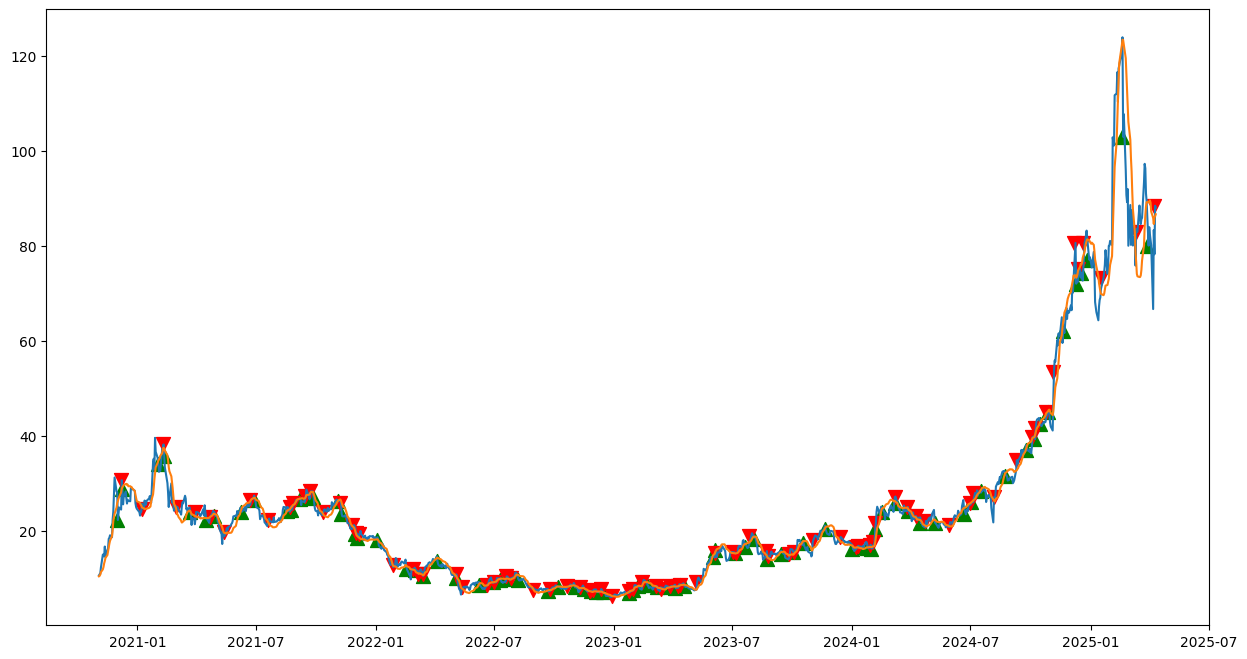

In [59]:
# Let's visuzlise the results
plt.figure(figsize=(15, 8))
plt.plot(all_df[[('Open', 'PLTR'), 'LSMA']]) # We are using Open column since we are buying on Open price
plt.scatter(buydates, all_df.loc[buydates].Open_shift, marker='^', color='g', label='Buy Signal', s=100)
plt.scatter(selldates, all_df.loc[selldates].Open_shift, marker='v', color='r', label='Sell Signal', s=100)
plt.show()

In [60]:
(profits > 0).value_counts()

True     52
False    27
Name: count, dtype: int64

In [62]:
# Lets count the win rate
win_rate = 52/(52+27)
win_rate

0.6582278481012658

### Summary